In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from sklearn.manifold import TSNE

In [2]:
Data = pd.read_csv("data\Q_A4260557.csv", header = 8,
                   index_col= 0,
                   parse_dates=True)

<>:1: SyntaxWarning: invalid escape sequence '\Q'
<>:1: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\pandu\AppData\Local\Temp\ipykernel_17016\4045145308.py:1: SyntaxWarning: invalid escape sequence '\Q'
  Data = pd.read_csv("data\Q_A4260557.csv", header = 8,


In [3]:
Data.head()

,Value,Quality Code,Interpolation Type
#Timestamp,,,
2008-01-02 08:09:00+09:30,0.0,10,102
2008-01-04 07:33:00+09:30,0.0,10,102
2008-01-07 12:00:00+09:30,0.0,10,102
2008-01-09 18:39:00+09:30,0.0,10,102
2008-01-15 23:15:00+09:30,0.0,10,102


<Axes: xlabel='#Timestamp'>

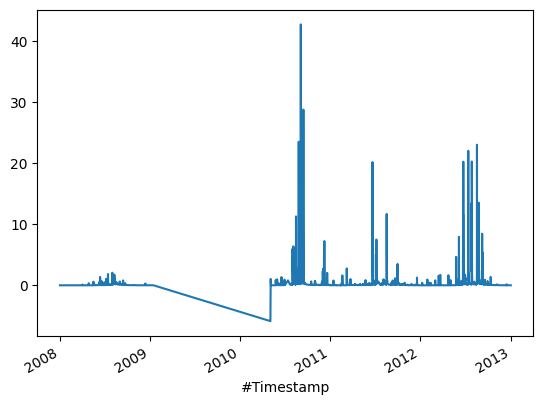

In [4]:
plt.figure()
Data['Value'].plot()

In [5]:
Data.groupby('Quality Code')['Value'].count()

Quality Code
-1          0
 10     27244
 110      135
 140        7
 210      101
Name: Value, dtype: int64

In [6]:
Data.groupby('Interpolation Type')['Value'].count()

Interpolation Type
101        0
102    27487
Name: Value, dtype: int64

Text(0, 0.5, 'Q (m3/s)')

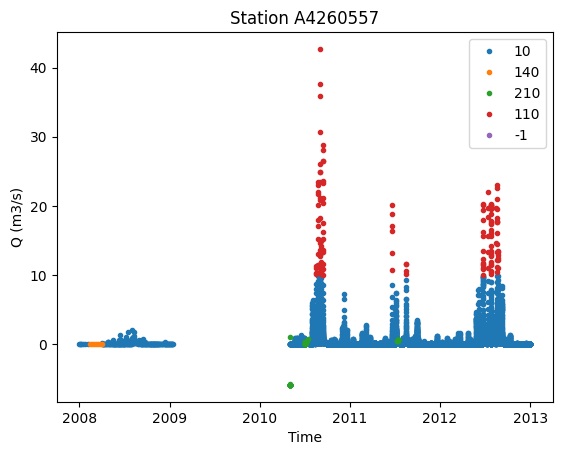

In [7]:
codes = Data['Quality Code'].unique()
fig, ax = plt.subplots()
for code in codes:
    indexs = Data["Quality Code"]==code
    ax.plot(Data.index[indexs], Data['Value'][indexs], '.', label=code)

l = ax.legend()
ax.set_title('Station A4260557')
ax.set_xlabel('Time')
ax.set_ylabel('Q (m3/s)')

Text(0, 0.5, 'Q (m3/s)')

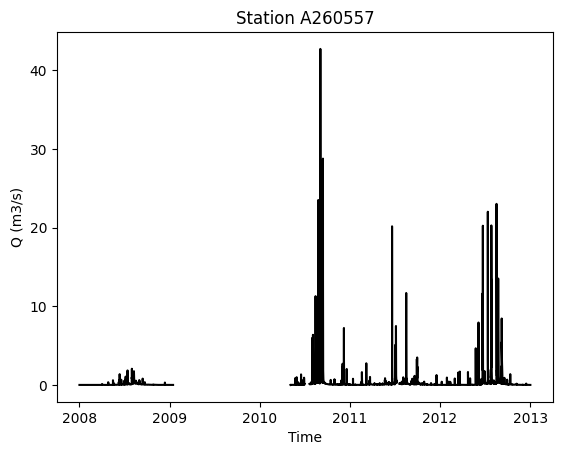

In [8]:
Data.loc[Data['Value']<0, 'Value'] = np.nan
Data.loc[Data['Quality Code']==210, 'Value']=np.nan
fig, ax = plt.subplots()
ax.plot(Data.index, Data['Value'], '-k')
ax.set_title('Station A260557')
ax.set_xlabel('Time')
ax.set_ylabel('Q (m3/s)')

C:\Users\pandu\AppData\Local\Temp\ipykernel_17016\205080643.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  flowduration['Discharge'] = discharge[-1::]


Text(0, 0.5, 'Q ($m^3/s$)')

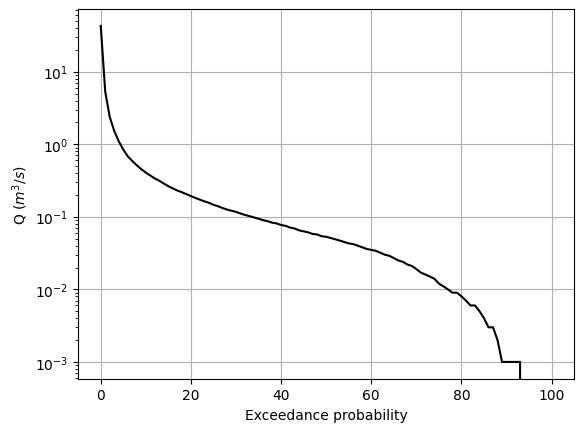

In [9]:
percs = np.arange(0,1.01,0.01)
discharge = Data['Value'].dropna().quantile(percs)
flowduration = pd.DataFrame(index=percs,columns=['Exceedance Probability','Discharge']) 
flowduration['Exceedance Probability'] = 100*(1-percs)
flowduration['Discharge'] = discharge[-1::]
fig,ax = plt.subplots()
ax.semilogy(flowduration['Exceedance Probability'],flowduration['Discharge'],'-k')
ax.grid()
ax.set_xlabel('Exceedance probability')
ax.set_ylabel(u'Q ($m^3/s$)') 

d:\GitHub\Hydrology-and-Hydrogeology-Data-Lab\function\flowduration.py:14: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  flowduration['Discharge'] = discharge[-1::]


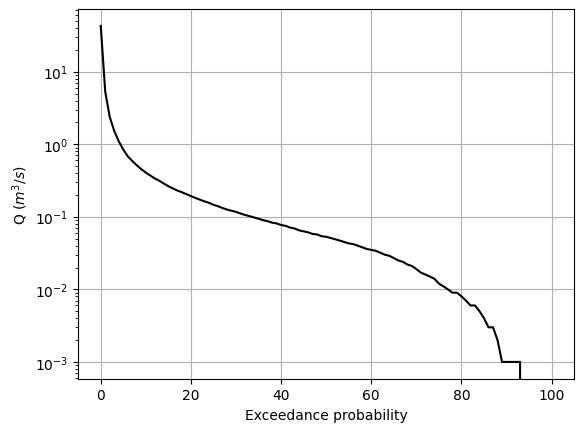

In [10]:
from function import flowduration as flow

fd, fig = flow.flowduration(Data)
fig.savefig('output/Flow Duration Curve.png')
fd.to_csv('output/Flow Duration Curve.csv', index_label='Percentile')